### Vamos a cargar los datos

In [5]:
from arreglo_datos import vectorDatos

In [6]:
path = 'C:\\Users\\masan\\Desktop\\Mario\\ESFM\\Octavo Semestre\\Servicio Social\\Etiquetas'
dic_nombre_marcas = vectorDatos(path)

#### Vamos a dividir los datos en conjunto de entrenamiento y testeo (80-20).

In [7]:
# Vamos a extraer los datos de cada imagen para poder hacer el split de datos.
vectorDeDatos = []
nombreDeImagenes = []
for key in dic_nombre_marcas.keys():
    vectorDeDatos.append(dic_nombre_marcas[key])
    nombreDeImagenes.append(key)

In [8]:
entrenamiento = int(0.8*len(vectorDeDatos))
datos_entrenamiento = vectorDeDatos[:entrenamiento]
datos_testeo = vectorDeDatos[entrenamiento:]

In [178]:
import torch
import cv2
from torchvision import transforms, utils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def rescale(data, output_size=150):
    
    path = 'C:\\Users\\masan\\Desktop\\Mario\\ESFM\\Octavo Semestre\\Servicio Social\\imagenes'
    nombre_imagen = data[-1][0]
    puntos = np.array([])
    
    for fila_datos in data[:-1]:
        puntos = np.append(puntos, np.array(fila_datos[5:]))
    puntos = puntos.reshape(14,2)
        
    h, w = 540, 960
    
    if h > w:
        new_h, new_w = output_size * h / w, output_size
    else:
        new_h, new_w = output_size, output_size * w / h
        
    new_h, new_w = int(new_h), int(new_w)
    
    img = Image.open(f'{path}\\{nombre_imagen}')
    img = np.asarray(img)
    img = cv2.resize(img, (new_w, new_h))
    
    # escalado de puntos
    puntos = puntos * [new_w/w, new_h/h]
    return {'image': img, 'puntos': puntos}

In [179]:
prueba = rescale(datos_testeo[0])

In [180]:
prueba['image'].shape

(150, 266, 3)

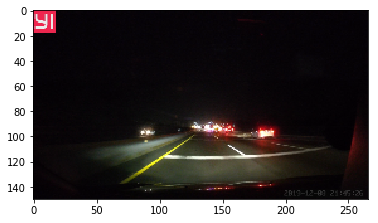

In [181]:
plt.imshow(prueba['image'])